In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy.optimize import differential_evolution

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def bi_exp(t, tau1, a1, tau2, a2):
    y= a1 * np.exp(-((1.0 / tau1)*t)) + a2 * np.exp(-((1.0 / tau2)*t))
    return y

def stretch_exp(t, tau, a, b):
    y = a * np.exp(-(t/tau)**b)
    return y

def single_exp(t, tau, a):
    y=a * np.exp(-((1.0 / tau)*t))
    return y

In [ ]:
### Fangyuan's code ### single_exp_fit 01/27/2022
def single_exp_fit(df, fun, p0):
    time = df.iloc[:,0]
    data = df.iloc[:,1]
    
    max_int = data.idxmax()
    
    # base=np.mean(data[:max_int]) #### these two-line code is designed to subtract the ref. from tr-PL
    # data = data - base
  
    data = data[max_int:]
   
    norm_data = []
  
    for i in range(len(data)):
        norm_data.append((data.iloc[i]/max(data)))
        
    norm_data = np.asarray(norm_data)
     
    time = np.asarray(time.iloc[max_int:])
    time = time - time[0]
    
    params, params_cov = curve_fit(fun, time, norm_data, maxfev=10000, p0=p0)
    
    plt.plot(time, norm_data, label='Raw Data', c='black')
    plt.plot(time, fun(time, params[0], params[1]), c='red', label="Fit")
    plt.legend()
    
  
    print('Tau: ' + str(params[0]))
    print('a: ' + str(params[1]))

    return time, norm_data, params

In [ ]:
### Fangyuan's code ### bi_exp_fit 01/27/2022
def bi_exp_fit(df, fun, p0):
    time = df.iloc[:,0]
    data = df.iloc[:,1]
    
    max_int = data.idxmax()
    
    # base=np.mean(data[:max_int])  #### getting the ref for the spectrum
    # data = data - base
    
    data = data[max_int:]
   
    norm_data = []
  
    for i in range(len(data)):
        norm_data.append((data.iloc[i]/max(data)))
        
    norm_data = np.asarray(norm_data)
     
    time = np.asarray(time.iloc[max_int:])
    time = time - time[0]
    
    params, params_cov = curve_fit(fun, time, norm_data, maxfev=100000, p0=p0)
    
    plt.plot(time, norm_data, label='Raw Data', c='black')
    plt.plot(time, fun(time, params[0], params[1], params[2], params[3]), c='red', label="Fit")
    plt.legend()
    
    ave_tau=(params[0]*params[1] + (params[2]*params[3]))/(params[1]+params[3])
  
    print('Tau1: ' + str(params[0]))
    print('Tau2: ' + str(params[2]))

    print('a1: ' + str(params[1]))
    print('a2: ' + str(params[3]))
    
    print('ave_tau:' + str(ave_tau))
    
    
    return time, norm_data, params

In [ ]:
#### Fangyuan's code ## stretched exponential fit ()
def stretch_exp_fit(df, fun, p0):
    time = df.iloc[:,0]
    data = df.iloc[:,1]
    
    max_int = data.idxmax()

    # base=np.mean(data[:max_int])
    # data = data - base

    data = data[max_int:]
   
    norm_data = []
  
    for i in range(len(data)):
        norm_data.append((data.iloc[i]/max(data)))
        
    norm_data = np.asarray(norm_data)
     
    time = np.asarray(time.iloc[max_int:])
    time = time - time[0]
    
    params, params_cov = curve_fit(fun, time, norm_data, maxfev=10000, p0=p0)
    
    plt.plot(time, norm_data, label='Raw Data', c='black')
    plt.plot(time, fun(time, params[0], params[1], params[2]), c='red', label="Fit")
    plt.legend()
    print('Tau: ' + str(params[0]))
    print('a: ' + str(params[1]))
    print('b: ' + str(params[2]))
    return time, norm_data, params

In [ ]:
lf_1 = pd.read_csv('### your file path #### ', header=None, skiprows=9, delimiter='\s+')

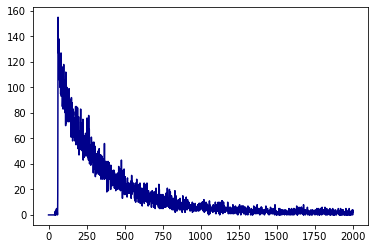

In [ ]:
plt.plot(lf_1.iloc[:,0], lf_1.iloc[:,1],color='darkblue')  ### for you to take a look at how the spectrum look like

Tau1: 12.45716685615482
Tau2: 269.0651077402318
a1: 0.21168959603594237
a2: 0.6888984687064371
ave_tau:208.74759580329058


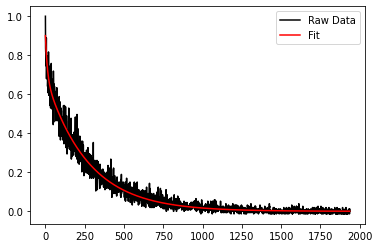

In [ ]:
time_bi_1, norm_data_bi_1, params_bi_1 = bi_exp_fit(lf_1, bi_exp, [1, 0.2, 1000, 0.2])   ### bi-exponential fit

# time_si_1, norm_data_si_1, params_si_1 = single_exp_fit(lf_1, single_exp, [0.2, 10])  #### single exponential fit

# time_stretch_1, norm_data_stretch_1, params_stretch_1 = stretch_exp_fit(lf_1, stretch_exp, [1, 0.2, 10])  #### stretched exponential fit


(0.0, 500.0)

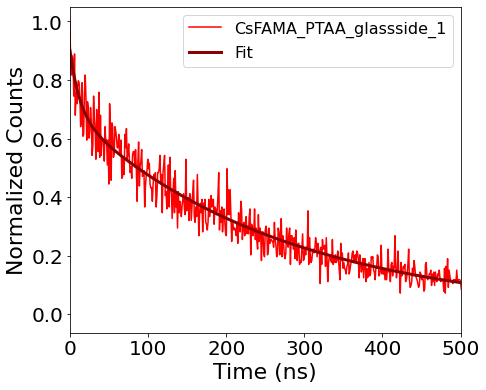

In [ ]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=[7,6])

### plot bi-exponential fit
plt.plot(time_bi_1, norm_data_bi_1, color='red', label='CsFAMA_PTAA_glassside_1')
plt.plot(time_bi_1, bi_exp(time_bi_1, params_bi_1[0], params_bi_1[1], params_bi_1[2], params_bi_1[3]) , color='darkred', label='Fit', lw=3)

#### plot single-exponential fit
# plt.plot(time_si_1, norm_data_si_1, color='red', label='FA30MA70_glass_1')
# plt.plot(time_si_1, single_exp(time_si_1, params_si_1[0], params_si_1[1]) , color='darkred', label='Fit', lw=3)

#### plot stretched exponential fit
# plt.plot(time_stretch_1, norm_data_stretch_1, color='red', label='lifetime_PTAA_2')
# plt.plot(time_stretch_1, stretch_exp(time_stretch_1, params_stretch_1[0], params_stretch_1[1], params_stretch_1[2]) , color='darkblue', label='Fit', lw=3)

plt.xlabel('Time (ns)', size=22)
plt.ylabel('###', size=22)
plt.xticks(size=20)
plt.yticks(size= 20)
plt.legend()
plt.xlim([0, 500])

In [ ]:
################ PL emission#####################

In [ ]:
pl_1 = pd.read_csv('### your file path####', header=None, skiprows=22, delimiter='\s+')

,0,1
0,29.296875,0.0
1,31.738281,0.0
2,34.179688,0.0
3,36.621094,0.0
4,39.062500,0.0
...,...,...
2031,4987.793000,4.0
2032,4990.234400,2.0
2033,4992.675800,1.0
2034,4995.117200,6.0


In [ ]:
# y1=savgol_filter(pl_1[1], 5, 1)    ### for you to smooth your spectrum if too much noise

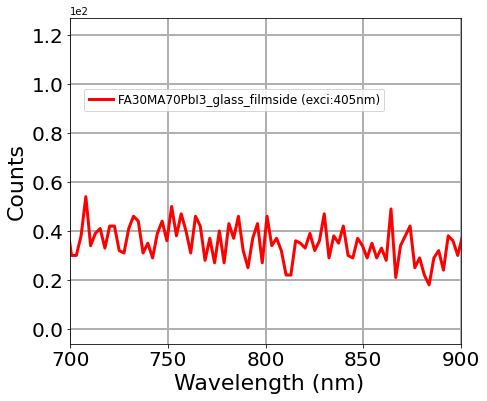

In [ ]:
plt.figure(figsize=[7,6])

plt.plot(pl_1[0], pl_1[1], 'red', lw=3, label='### file name ###')
plt.xlabel(" Wavelength (nm)", size=22)
plt.ylabel("Counts", size=22)
plt.xticks(size=20)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.yticks(size= 20)
plt.rc('font', size=20)
plt.grid(linewidth=2, alpha=2)
plt.xlim([700, 900])
plt.legend(loc='upper right', labelspacing=0.4, handletextpad=0.4,fontsize=12, bbox_to_anchor=(0.02, 0.3, 0.8, 0.5)) 


In [ ]:
#### to calculate the PL peak and FWHM from your PL emission spectrum

def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))
def half_max_x(x, y):
    half = max(y)/2.0
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    return [lin_interp(x, y, zero_crossings_i[0], half),
            lin_interp(x, y, zero_crossings_i[1], half)]
# make some fake data
x,y=pl_1[0],y1   #### load your data here

# find the two crossing points
hmx = half_max_x(x,y)
# print the answer
fwhm = hmx[1] - hmx[0]
print("FWHM:{:.3f}".format(fwhm))
# a convincing plot
# half = max(y)/2.0
# mp.plot(x,y)
# mp.plot(hmx, [half, half])
# mp.show()
#wavelength at max peak position
wave_max=x[np.argmax(y1)]
wave_max

FWHM:46.762


775.0